# *Лабораторна робота №2.*
# *По темі : Пакет Tensorflow, а також sklearn.datasets.make_regression.*
***


## **Виконав:** 
* ## Студент 4 курсу
* ## Группи АнД-41
* ## Сірий Артем Олександрович
* ## Варінат №11

***

## *Завдання :*
## 1. Поглиблено вивчити функцію make_regression.
## 2. Згенерувати набір даних за допомогою означеної функції, з використанням якнайбільшої кількості параметрів.
## 3. Розмірність набору даних прийняти у вигляді (100000х(30-n)), де n - номер за списком. (1 900 000)
## 4. Здійснити моделювання згенерованого набору даних та візуалізацію результатів.
## 5. Результати оформити у вигляді файлів:

* ## набір даних у форматі .csv
* ## код для формування набору даних у форматі .ipynb
* ## код для моделювання та візуалізації у форматі .ipynb

***


# *Візуалізація даних*

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [52]:
df = pd.read_csv('lab2_csv.csv')
print(df.head(2))

   Unnamed: 0         0         1         2         3         4         5  \
0           0 -0.000600 -0.002063  0.002016  0.004812 -0.000659  0.002109   
1           1  0.001148  0.002411 -0.002955  0.000418  0.000122  0.001555   

          6         7         8         9        10        11        12  \
0  0.002016 -0.003267 -0.001746 -0.002427  0.002708 -0.002813  0.004847   
1 -0.000029  0.000012 -0.002164  0.000199 -0.001271  0.000085  0.001532   

         13        14        15        16        17        18  
0  0.001610 -0.000517  0.001443 -0.003883 -0.000243  0.143266  
1 -0.000287 -0.000118  0.002421 -0.004296  0.001835 -0.247763  


In [53]:
X = df.drop(['18'], axis=1).copy()
Y = df['18'].copy()
print('X is :\n',X.head(2),'\n')
print('Y is :\n',Y.head(2))

X is :
    Unnamed: 0         0         1         2         3         4         5  \
0           0 -0.000600 -0.002063  0.002016  0.004812 -0.000659  0.002109   
1           1  0.001148  0.002411 -0.002955  0.000418  0.000122  0.001555   

          6         7         8         9        10        11        12  \
0  0.002016 -0.003267 -0.001746 -0.002427  0.002708 -0.002813  0.004847   
1 -0.000029  0.000012 -0.002164  0.000199 -0.001271  0.000085  0.001532   

         13        14        15        16        17  
0  0.001610 -0.000517  0.001443 -0.003883 -0.000243  
1 -0.000287 -0.000118  0.002421 -0.004296  0.001835   

Y is :
 0    0.143266
1   -0.247763
Name: 18, dtype: float64


In [54]:
df.shape

(100000, 20)

In [55]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, Y, test_size=0.4)

model = LinearRegression()
model.fit(Xtrn, Ytrn)

Ypred = model.predict(Xtest)

In [56]:
X_for_test = range(Ytest.size) # Convert 19 to 1 (list)
X_for_trn = range(Ytrn.size)
X_for_test

range(0, 40000)

In [57]:
mean_squared_error(Ytest,Ypred)

0.00997309670047778

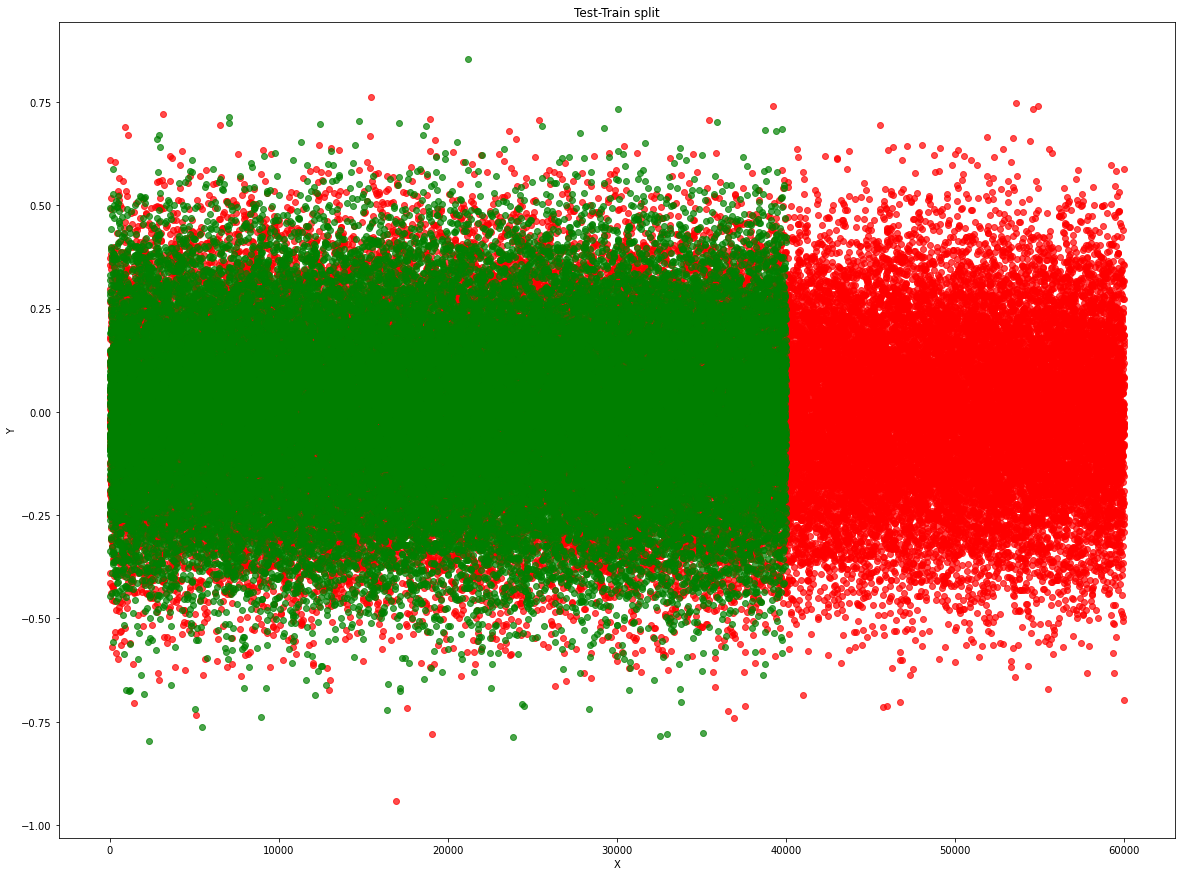

In [58]:
plt.figure(figsize=(20,15))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Test-Train split")
plt.scatter(X_for_trn,Ytrn, label='Train data', color='r',alpha=.7)
plt.scatter(X_for_test,Ytest, label='Test data', color='g',alpha=.7)
plt.show()

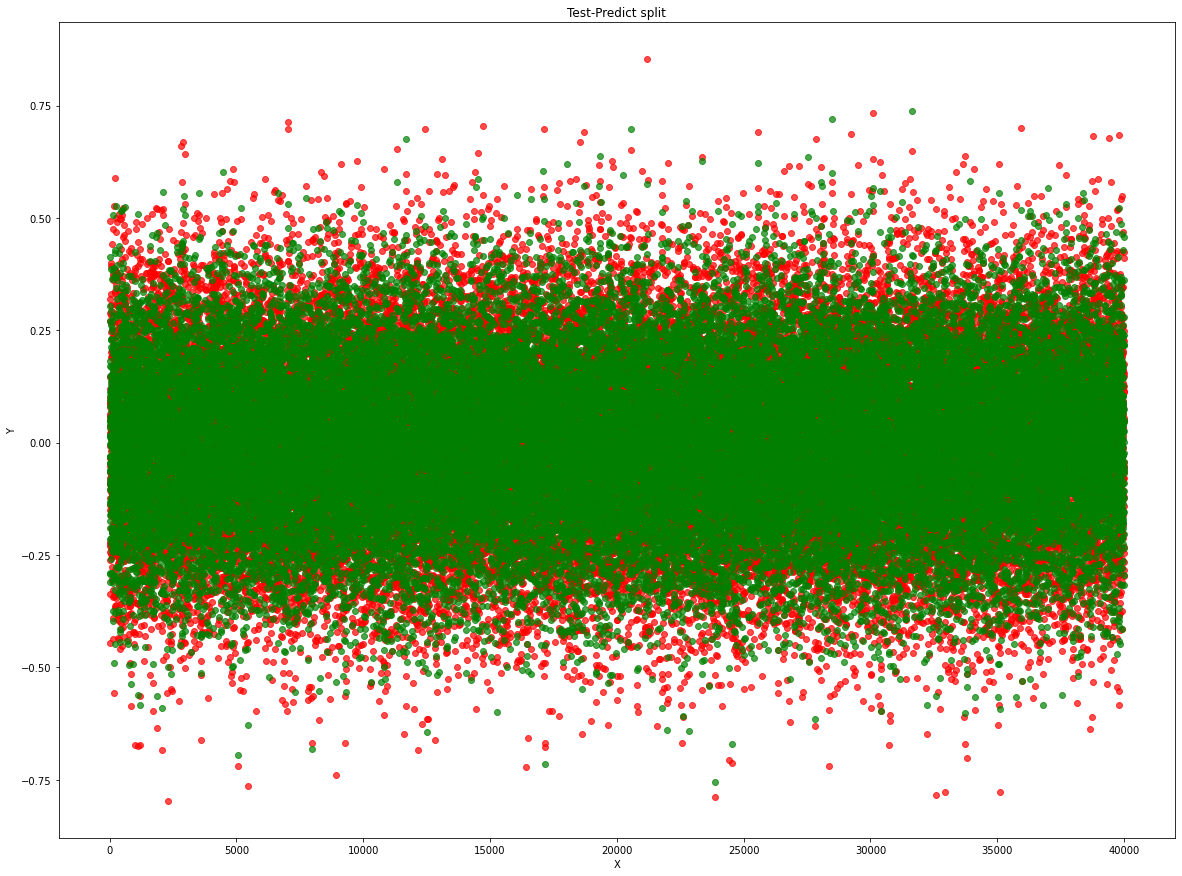

In [59]:
plt.figure(figsize=(20,15))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Test-Predict split")
plt.scatter(X_for_test,Ytest, label='Train data', color='r',alpha=.7)
plt.scatter(X_for_test,Ypred, label='Predict data', color='g',alpha=.7)
plt.show()

In [60]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.optimizers import SGD, Adam

In [61]:
tf.random.set_seed(717)

model1 = Sequential(
    [
        Dense(100), 
        Dense(1)
    ]
)

model1.compile(
    loss = mae,
    optimizer = Adam(), 
    metrics = [mae,mse]
)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [63]:
history1 = model1.fit(X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs=10,
    batch_size = 64
    )

Epoch 1/10
1250/1250 [==============================] - 1s 608us/step - loss: 152.4415 - mean_absolute_error: 152.4415 - mean_squared_error: 82663.4453 - val_loss: 171.6415 - val_mean_absolute_error: 171.6415 - val_mean_squared_error: 39282.3516
Epoch 2/10
1250/1250 [==============================] - 1s 542us/step - loss: 149.0363 - mean_absolute_error: 149.0363 - mean_squared_error: 46724.2305 - val_loss: 91.2290 - val_mean_absolute_error: 91.2290 - val_mean_squared_error: 11095.2646
Epoch 3/10
1250/1250 [==============================] - 1s 547us/step - loss: 129.9481 - mean_absolute_error: 129.9481 - mean_squared_error: 35237.9258 - val_loss: 172.7143 - val_mean_absolute_error: 172.7143 - val_mean_squared_error: 39776.5742
Epoch 4/10
1250/1250 [==============================] - 1s 547us/step - loss: 123.5319 - mean_absolute_error: 123.5319 - mean_squared_error: 31906.0938 - val_loss: 75.9218 - val_mean_absolute_error: 75.9218 - val_mean_squared_error: 7688.5127
Epoch 5/10
1250/1250 

Text(0.5, 1.0, 'Model1')

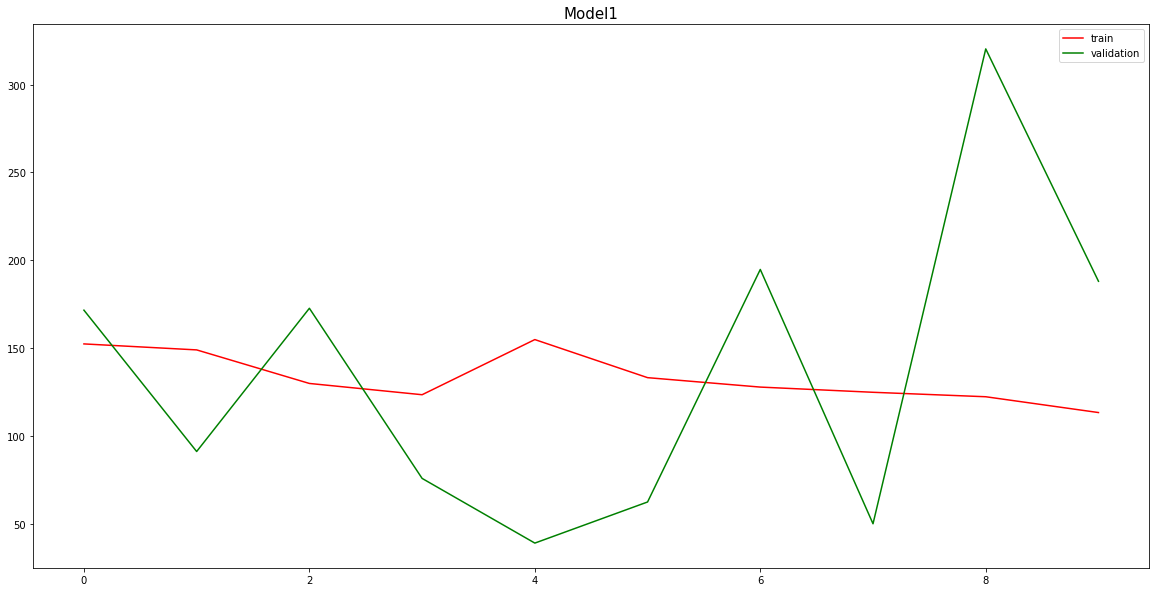

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(history1.history['loss'], 'red', label='train')
ax.plot(history1.history['val_loss'], 'green' ,label='validation')
ax.legend()
plt.title("Model1", fontsize = 15)

# Створили просту базову модель. Як бачимо функція MAE має не дуже гарну точність, тому оберемо MSE і збільшимо кількість нейронів

In [69]:
model2 = Sequential(
    [
        Dense(50), 
        Dense(1)
    ]
)

model2.compile(
    loss = mse,
    optimizer = Adam(), 
    metrics = [mae,mse]
)

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [74]:
history2 = model2.fit(X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs=50,
    batch_size = 100
    )

Epoch 1/50
800/800 [==============================] - 0s 593us/step - loss: 688.7781 - mean_absolute_error: 9.1682 - mean_squared_error: 688.7781 - val_loss: 0.1179 - val_mean_absolute_error: 0.2841 - val_mean_squared_error: 0.1179
Epoch 2/50
800/800 [==============================] - 0s 552us/step - loss: 558.2282 - mean_absolute_error: 8.2359 - mean_squared_error: 558.2282 - val_loss: 5.2218 - val_mean_absolute_error: 1.9665 - val_mean_squared_error: 5.2218
Epoch 3/50
800/800 [==============================] - 0s 562us/step - loss: 589.8231 - mean_absolute_error: 6.1221 - mean_squared_error: 589.8231 - val_loss: 0.0916 - val_mean_absolute_error: 0.2496 - val_mean_squared_error: 0.0916
Epoch 4/50
800/800 [==============================] - 0s 561us/step - loss: 377.3570 - mean_absolute_error: 8.7424 - mean_squared_error: 377.3570 - val_loss: 18.1899 - val_mean_absolute_error: 3.6771 - val_mean_squared_error: 18.1899
Epoch 5/50
800/800 [==============================] - 0s 563us/step - 

Text(0.5, 1.0, 'Model2')

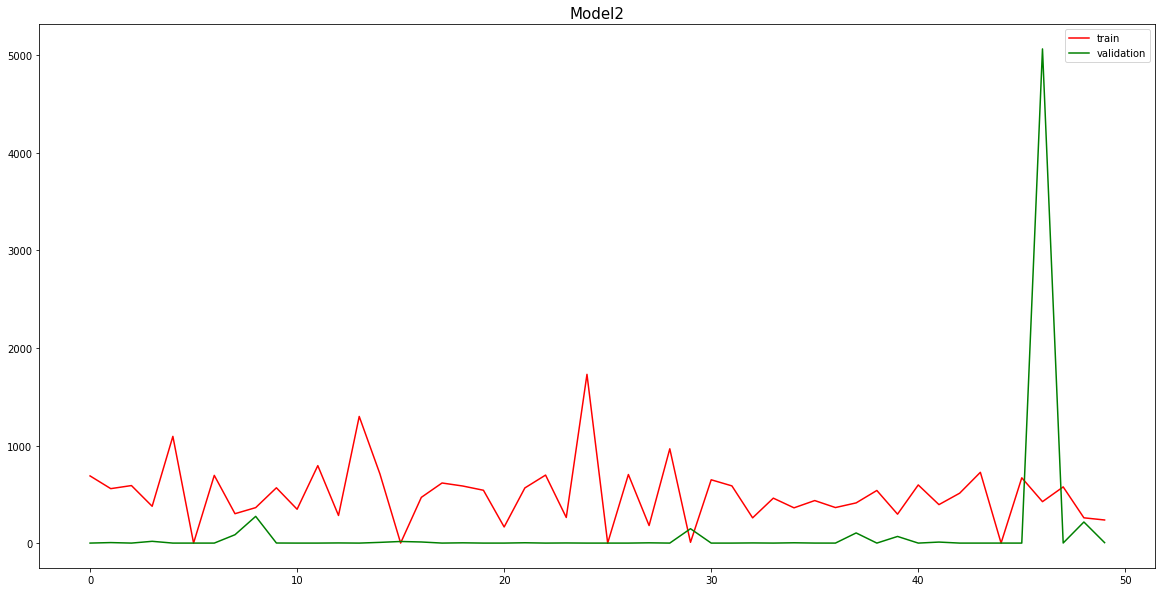

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(history2.history['loss'], 'red', label='train')
ax.plot(history2.history['val_loss'], 'green' ,label='validation')
ax.legend()
plt.title("Model2", fontsize = 15)

# Даємо маленьку вибірку для навчання 20000 даних і маємо не достатньо сильне співпадіння
# Далі збільшимо вибірку до 40000 даних та перевіримо результати

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4)

In [77]:
history2 = model2.fit(X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs=50,
    batch_size = 100
    )

Epoch 1/50
600/600 [==============================] - 0s 740us/step - loss: 221.9872 - mean_absolute_error: 5.3733 - mean_squared_error: 221.9872 - val_loss: 12984.0352 - val_mean_absolute_error: 98.7145 - val_mean_squared_error: 12984.0352
Epoch 2/50
600/600 [==============================] - 0s 691us/step - loss: 432.7422 - mean_absolute_error: 5.3242 - mean_squared_error: 432.7422 - val_loss: 13.5570 - val_mean_absolute_error: 3.1861 - val_mean_squared_error: 13.5570
Epoch 3/50
600/600 [==============================] - 0s 693us/step - loss: 611.4407 - mean_absolute_error: 6.8981 - mean_squared_error: 611.4407 - val_loss: 0.1399 - val_mean_absolute_error: 0.3151 - val_mean_squared_error: 0.1399
Epoch 4/50
600/600 [==============================] - 0s 716us/step - loss: 685.2012 - mean_absolute_error: 6.4907 - mean_squared_error: 685.2012 - val_loss: 0.0701 - val_mean_absolute_error: 0.2185 - val_mean_squared_error: 0.0701
Epoch 5/50
600/600 [==============================] - 0s 711u

Text(0.5, 1.0, 'Model2')

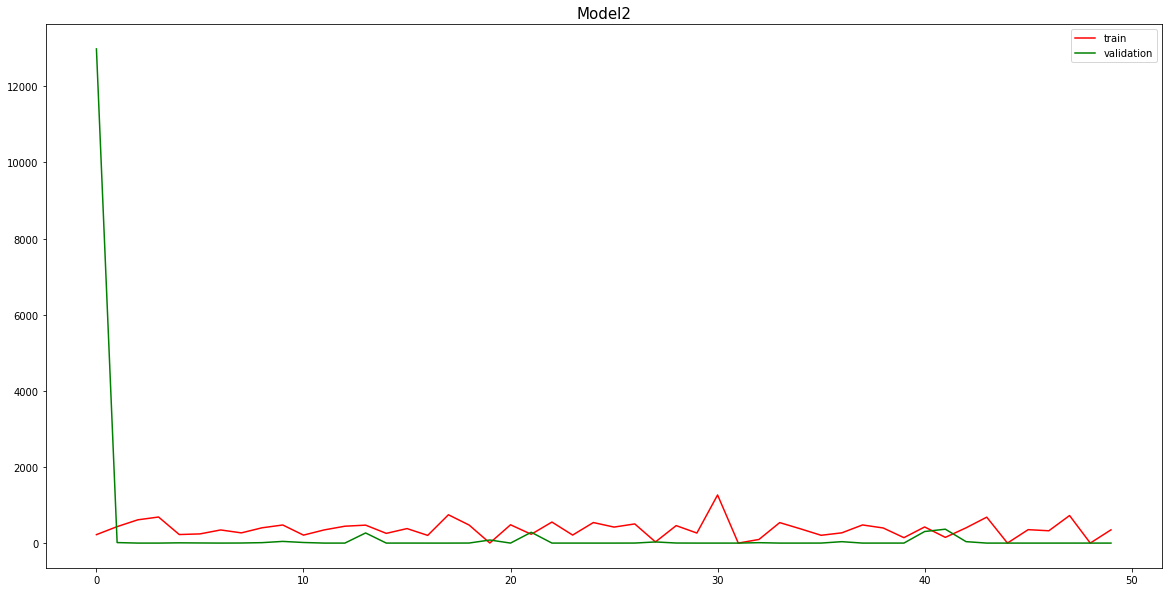

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(history2.history['loss'], 'red', label='train')
ax.plot(history2.history['val_loss'], 'green' ,label='validation')
ax.legend()
plt.title("Model2", fontsize = 15)

# Як видно результат кращий аніж був. Спробуємо покращити .

In [90]:
model3 = Sequential(
    [
        Dense(100), 
        Dense(1)
    ]
)

model3.compile(
    loss = mse,
    optimizer = Adam(), 
    metrics = [mae,mse]
)

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.45)

In [92]:
history3 = model3.fit(X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs=50,
    batch_size = 100
    )

Epoch 1/50
550/550 [==============================] - 1s 884us/step - loss: 984715.6875 - mean_absolute_error: 187.0757 - mean_squared_error: 984715.6875 - val_loss: 0.0420 - val_mean_absolute_error: 0.1634 - val_mean_squared_error: 0.0420
Epoch 2/50
550/550 [==============================] - 0s 754us/step - loss: 0.0430 - mean_absolute_error: 0.1657 - mean_squared_error: 0.0430 - val_loss: 0.0430 - val_mean_absolute_error: 0.1654 - val_mean_squared_error: 0.0430
Epoch 3/50
550/550 [==============================] - 0s 758us/step - loss: 0.0433 - mean_absolute_error: 0.1662 - mean_squared_error: 0.0433 - val_loss: 0.0417 - val_mean_absolute_error: 0.1627 - val_mean_squared_error: 0.0417
Epoch 4/50
550/550 [==============================] - 0s 750us/step - loss: 0.0435 - mean_absolute_error: 0.1667 - mean_squared_error: 0.0435 - val_loss: 0.0416 - val_mean_absolute_error: 0.1626 - val_mean_squared_error: 0.0416
Epoch 5/50
550/550 [==============================] - 0s 749us/step - loss: 

Text(0.5, 1.0, 'Model2')

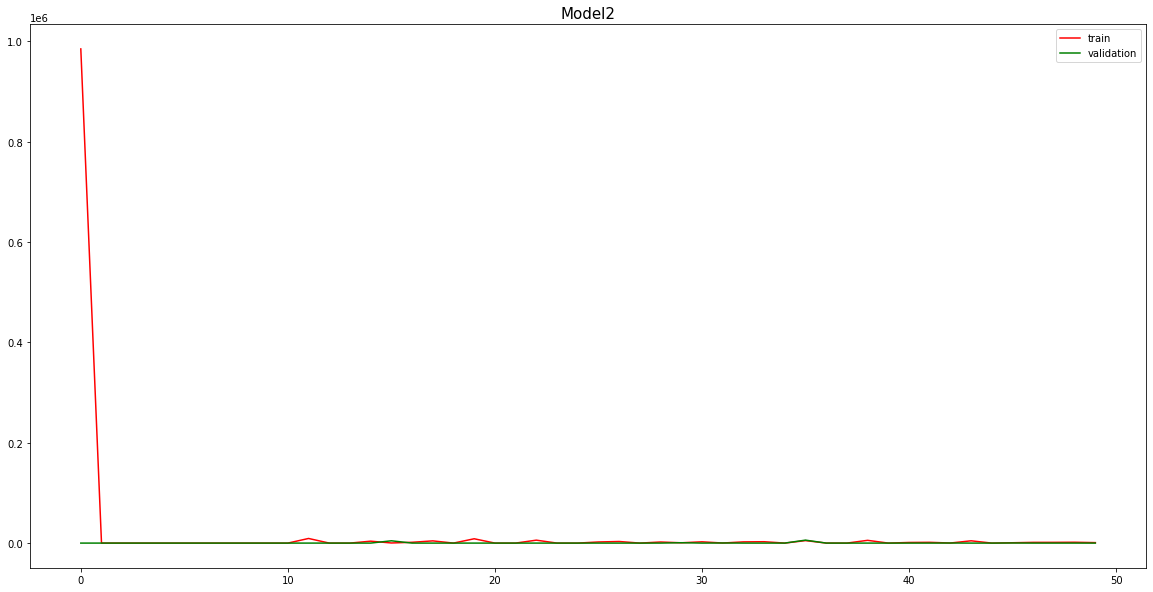

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(history3.history['loss'], 'red', label='train')
ax.plot(history3.history['val_loss'], 'green' ,label='validation')
ax.legend()
plt.title("Model2", fontsize = 15)

# Спроба виявилась кращою. Домоглися цього з допомогою збільшення нейронів, зменшення тестової вибірки та збільшення кількость епох та даних за раз (batch_size)

***
# *Висновок*
***
## *В ході виконання лаборатоної роботи було використано функцію make_regression з пакету sklearn.*
## *Як видно з останнього графіку, за заданим розподілом та з шумом 0.1 маємо досить гарну точність, яка підтверджуюється  середньою квадратичною помилкою в 0.01.*
## *Якщо ж встановити шум = 0, то маємо повне співпадіння точок прогнозу та тесту. Що свідчить про перенавчання моделі. Це можна обійти зменшивши вибірку тренування, або ж збільшити шум*